In [1]:
# 필요한 라이브러리 호출

import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns # 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

# 파일 위치 확인 (맥북 파일경로 복사 : command + option + c)
import os
print(os.listdir("/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [2]:
# 1) 훈련, 테스트 데이터셋의 개괄적인 형태 및 데이터의 컬럼의 속성 및 값의 개수 파악

# train, test 데이터셋을 불러온다
train = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/train.csv')
test = pd.read_csv('/Users/bumchanpark/Desktop/MachineLearning_Study/AiffelResearch/data/test.csv')

In [3]:
# .head() : train 데이터의 가장 앞의 5개의 데이터를 불러온다
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
"""
datetime - 시간별 날짜 + 타임스탬프
season - 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
holiday - 해당 요일이 휴일인지 여부
workingday - 해당 요일이 주말이나 휴일이 아닌지 여부
weather - 1: 맑음, 구름 조금, 구름 조금, 구름 조금
2: 안개 + 흐림, 안개 + 구름 조금, 안개 + 구름 조금, 안개
3: 가벼운 눈, 가벼운 비 + 뇌우 + 흩어진 구름, 가벼운 비 + 흩어진 구름
4: 폭우 + 유빙판 + 뇌우 + 안개, 눈 + 안개
temp - 섭씨 온도
atemp - 체감 온도(섭씨)
humidity - 상대 습도
windspeed - 풍속
casual - 미등록 사용자 대여 시작 횟수
registered - 등록된 사용자 대여 시작 횟수
count - 총 대여 횟수
"""

# 훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
# test 데이터의 가장 앞의 5개의 데이터를 불러온다
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# 2) 데이터 전처리 및 시각화

# datetime 속성을 분리하여 추출 속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다
train['tempDate'] = train.datetime.apply(lambda x:x.split())

In [7]:
# 분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.
# split() :

train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])

train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [8]:
# 분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음

train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [9]:
# year,month,day,hour가 숫자형으로 변환되었음을 알 수 있음
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [10]:
# 필요를 다한 tempDate column을 drop함
train = train.drop('tempDate',axis=1)

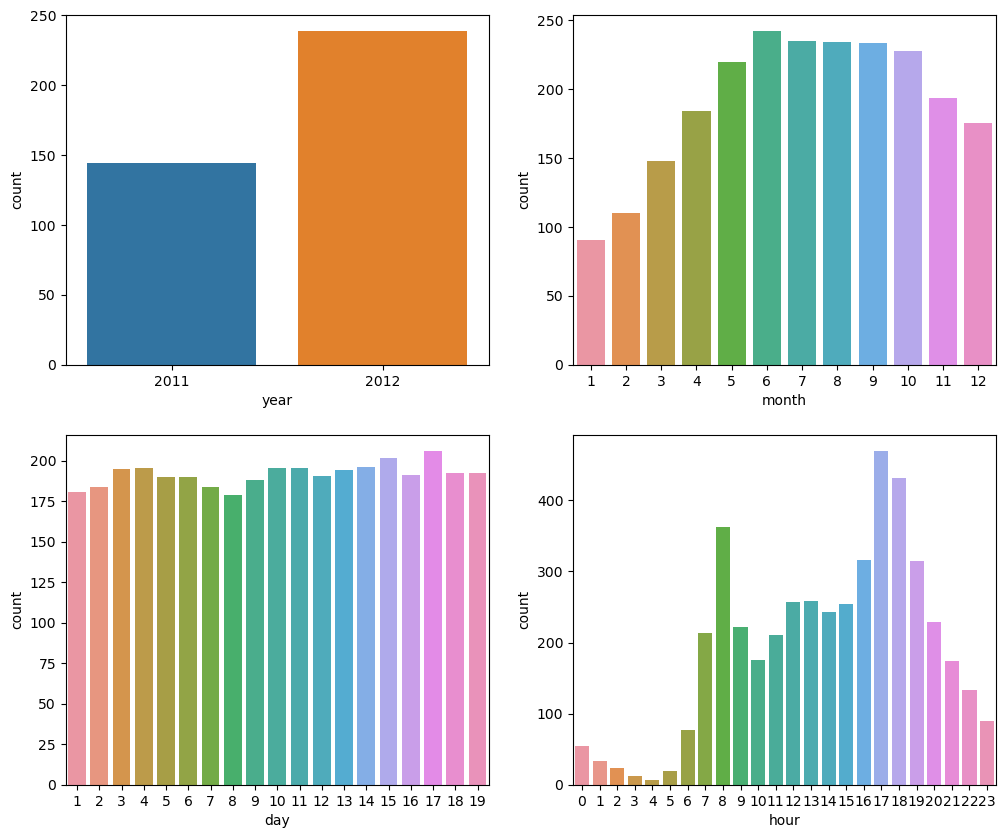

In [11]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

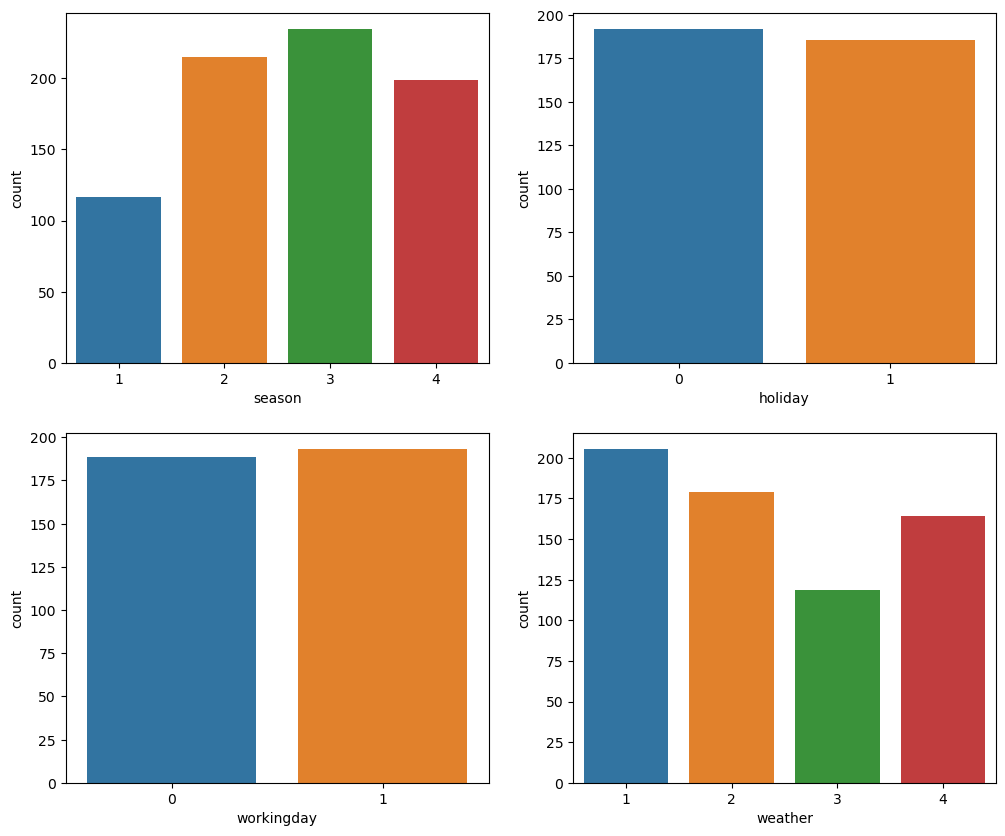

In [12]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [13]:
"""
해당 부분은 필자가 스스로 데이터를 보고 이상함을 느껴 전처리함
왜냐하면, 처음 import한 데이터 셋에서 head()를 하였을 때 1월 1일의 season column은 1 즉 봄을 가르키는데
직접 3월에 washington을 직접 가본 결과 1월은 확실히 겨울이다
따라서 아래의 badToRight를 이용하여 season column을 수정하고자 했음
이 데이터 때문에 참조했던 커널과는 다른 정확도를 나타낼 수 있음
"""

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
train['season'] = train.month.apply(badToRight)

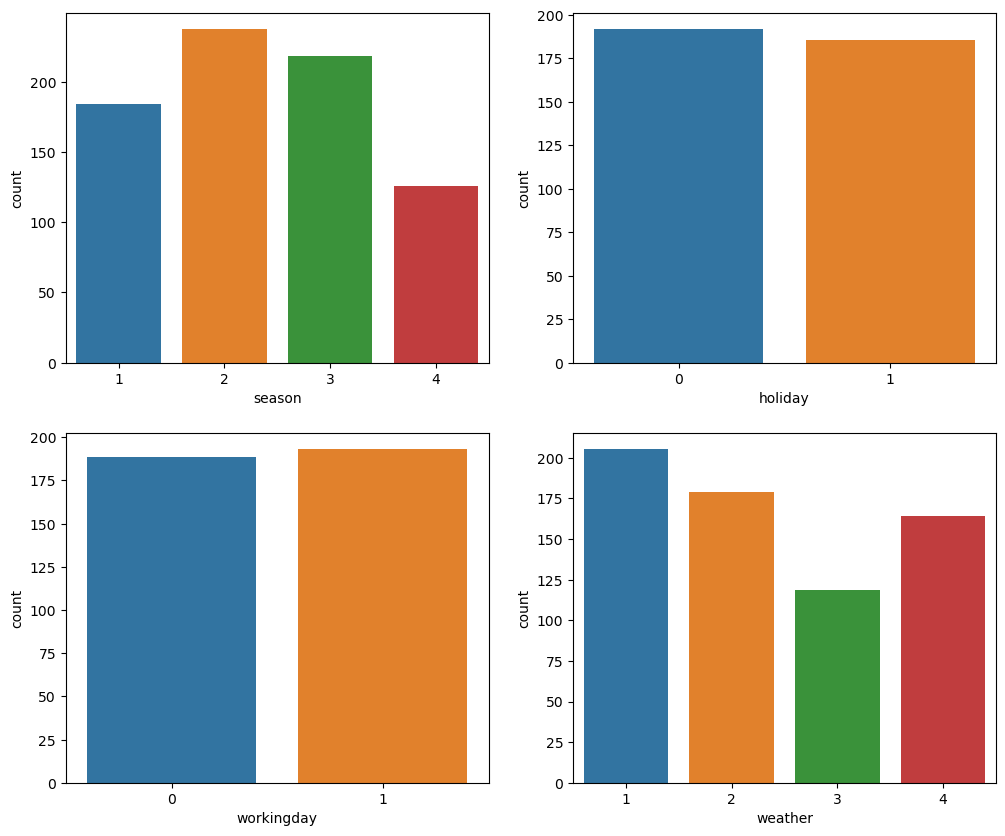

In [14]:
#위의 시각화와 같이 하나의 컬럼과 결과 값을 비교해보자

#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

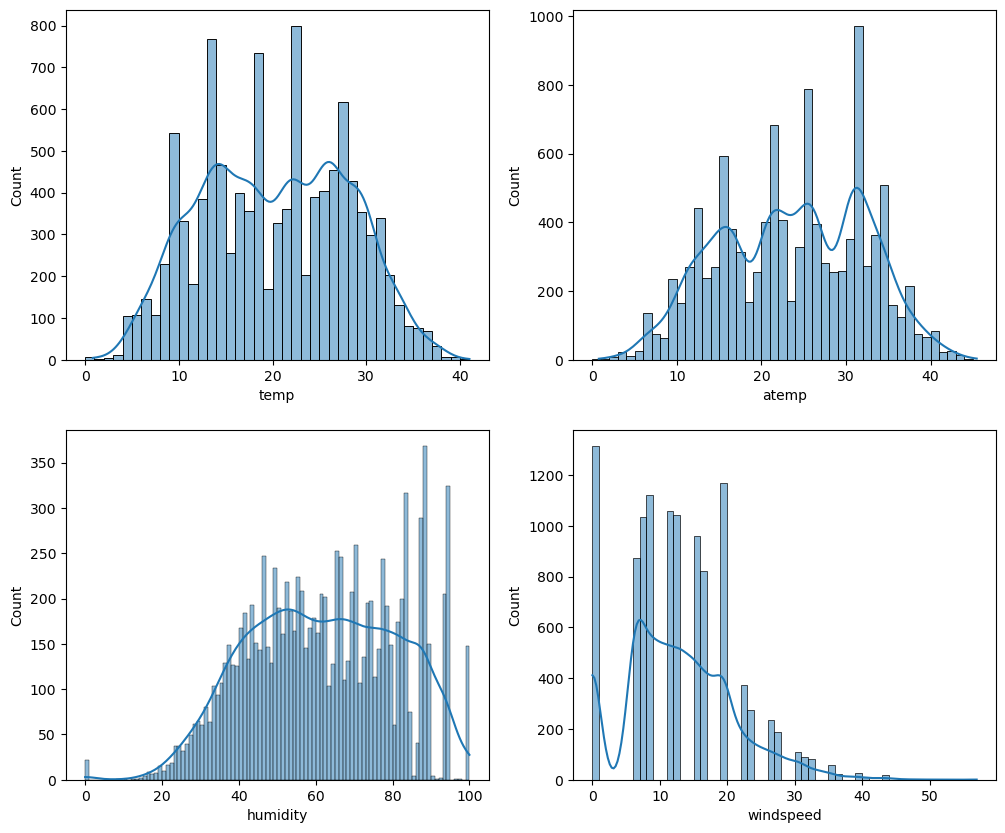

In [16]:
# 그리고 남은 분포를 통해 표현하였을 때 좋은 컬럼들을 count와 비교해보자

# 온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.histplot(train.temp, bins=range(int(train.temp.min()), int(train.temp.max())+1), kde=True)

# 평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.histplot(train.atemp, bins=range(int(train.atemp.min()), int(train.atemp.max())+1), kde=True)

# 습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.histplot(train.humidity, bins=range(int(train.humidity.min()), int(train.humidity.max())+1), kde=True)

# 바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.histplot(train.windspeed, bins=range(int(train.windspeed.min()), int(train.windspeed.max())+1), kde=True)


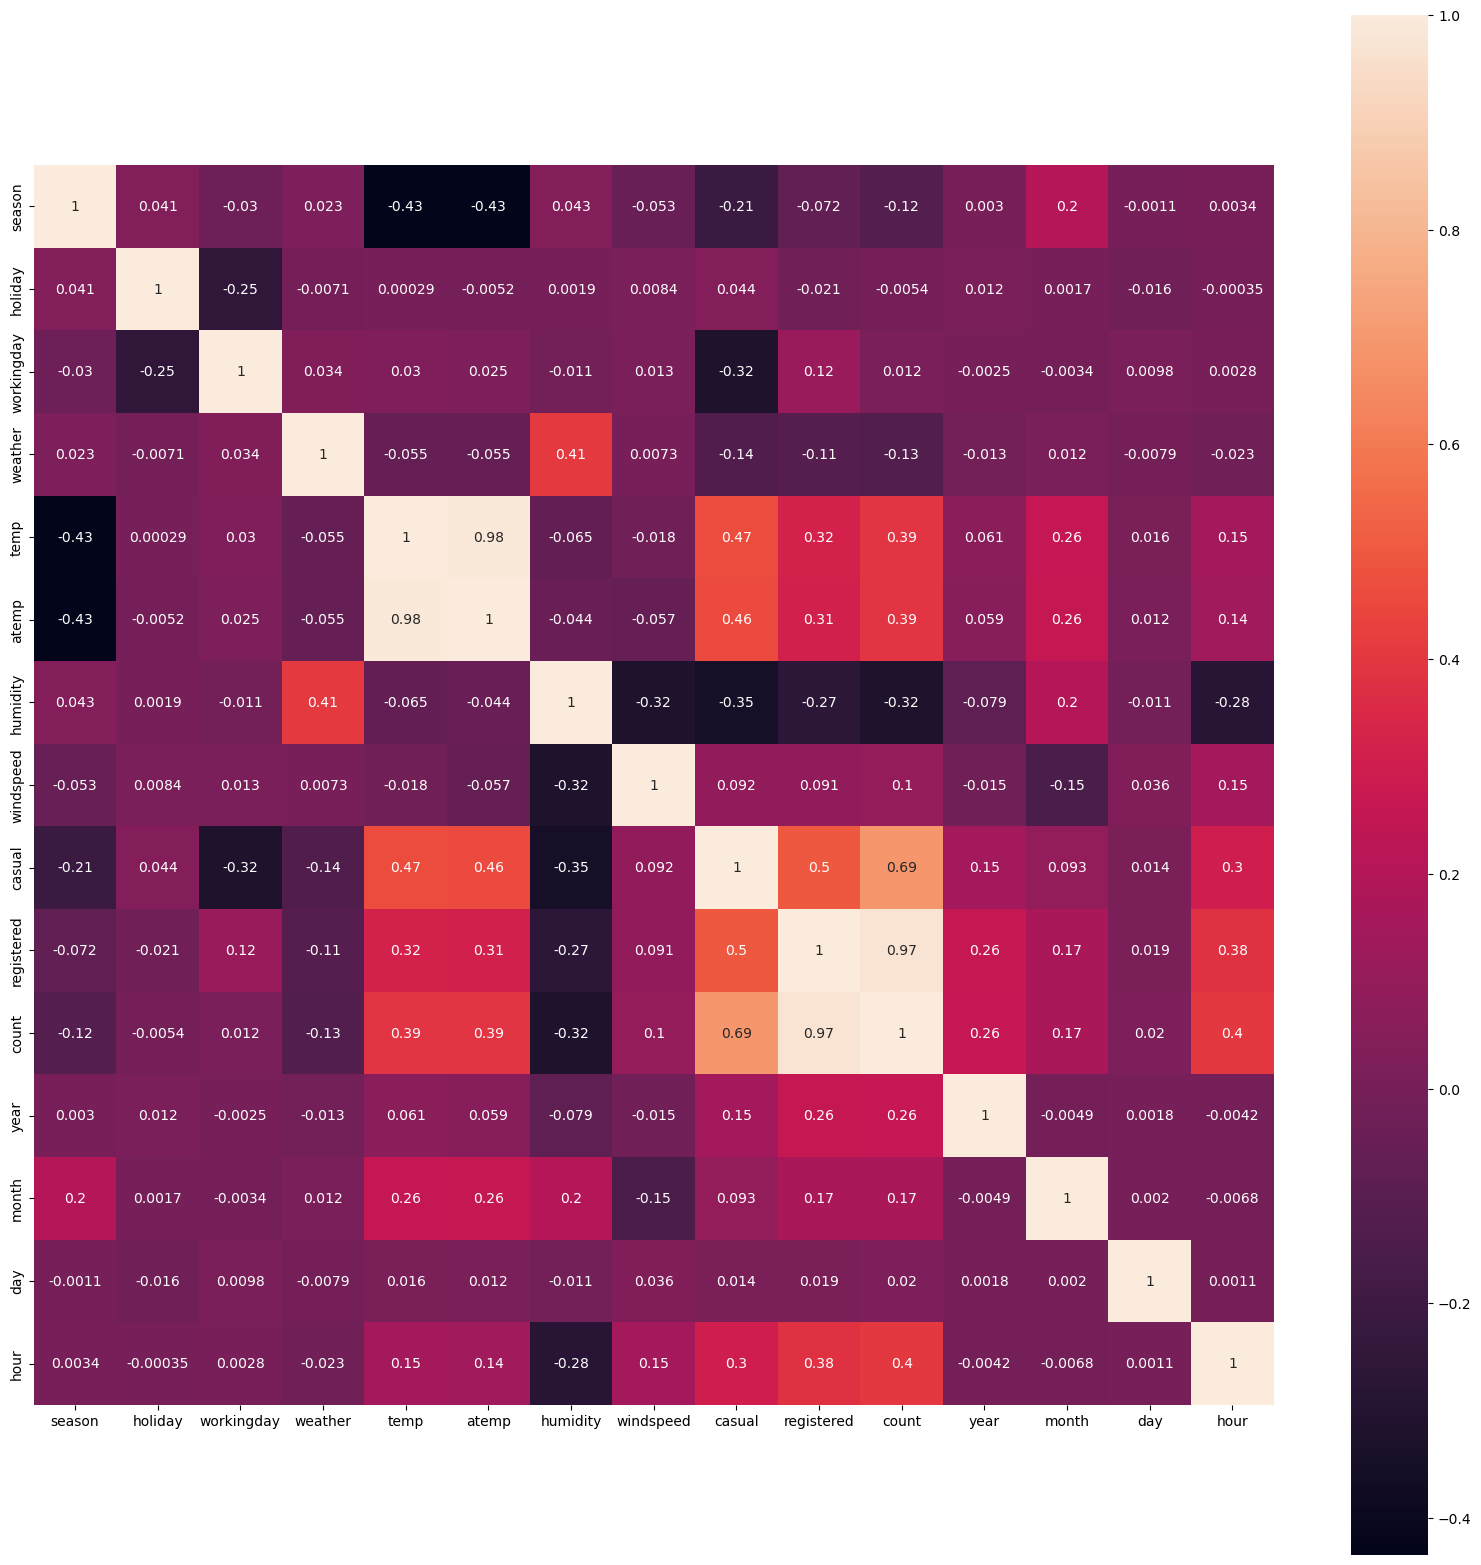

In [17]:
# 각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

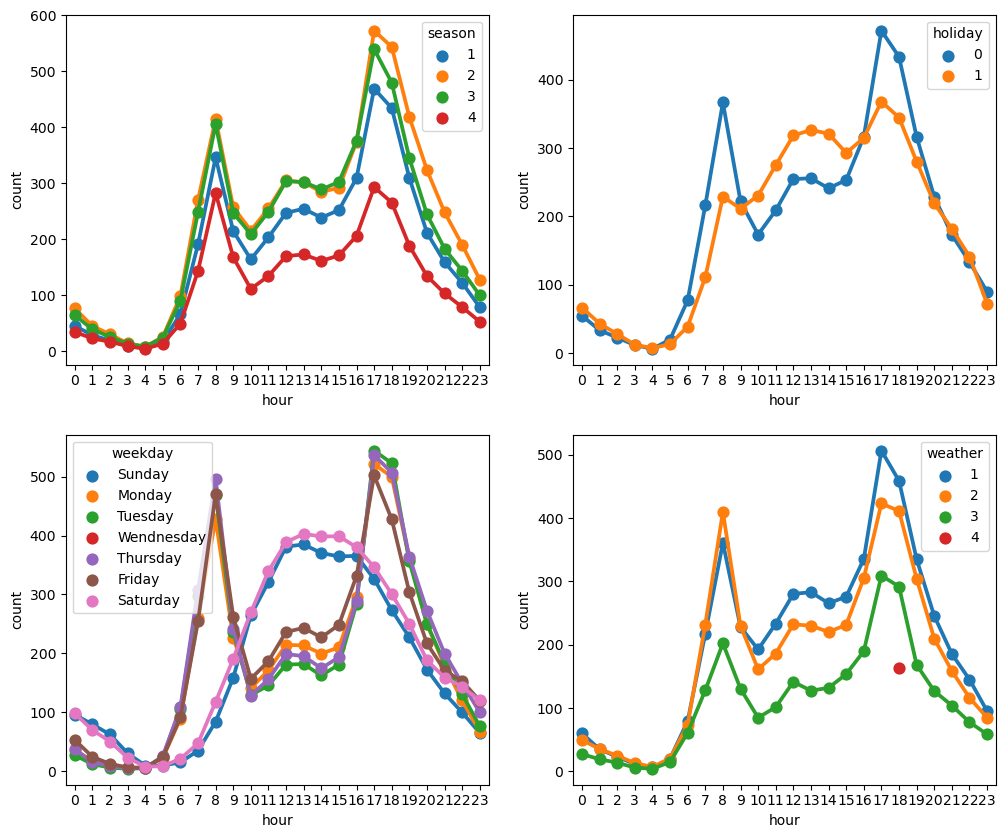

In [18]:
# heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화

# 시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

# 시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

# 시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [19]:
# 날씨 시각화의 4에 이상치가 있는 것 같아서 확인

train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


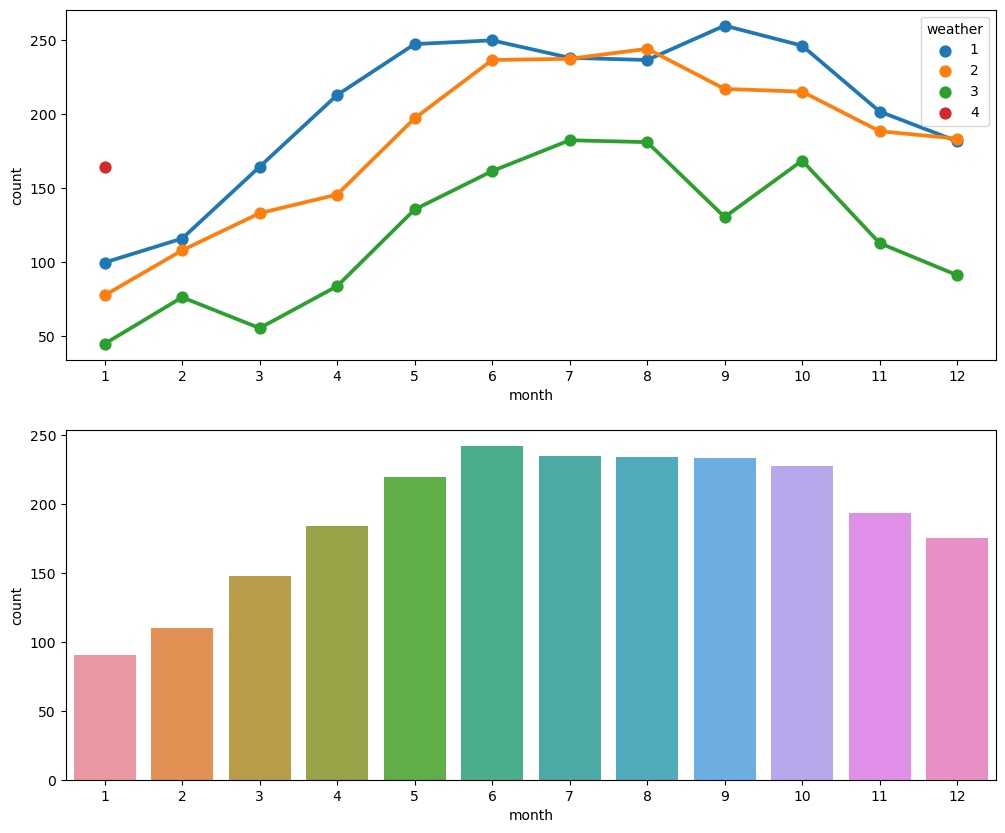

In [20]:
# 달과 날씨에 따른 count 
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

# 달 별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

In [22]:
"""
Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우가 있다
하지만 후자의 생각을 가지고 우리의 데이터를 활용하여 windspeed값을 부여
"""

# 머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환
train['weekday']= train.weekday.astype('category')

print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [23]:
# 0 : Sunday > 6 : Saturday
train.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [24]:
"""
RandomForest를 활용하여 Windspeed값을 부여하기!

하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다
"""

from sklearn.ensemble import RandomForestRegressor

# Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
# Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

# Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

# Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

# 모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

# 학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)

# 도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [25]:
# 나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

# 시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

# 합쳐진 데이터를 datetime순으로 정렬
train = train.sort_values(by=['datetime'])

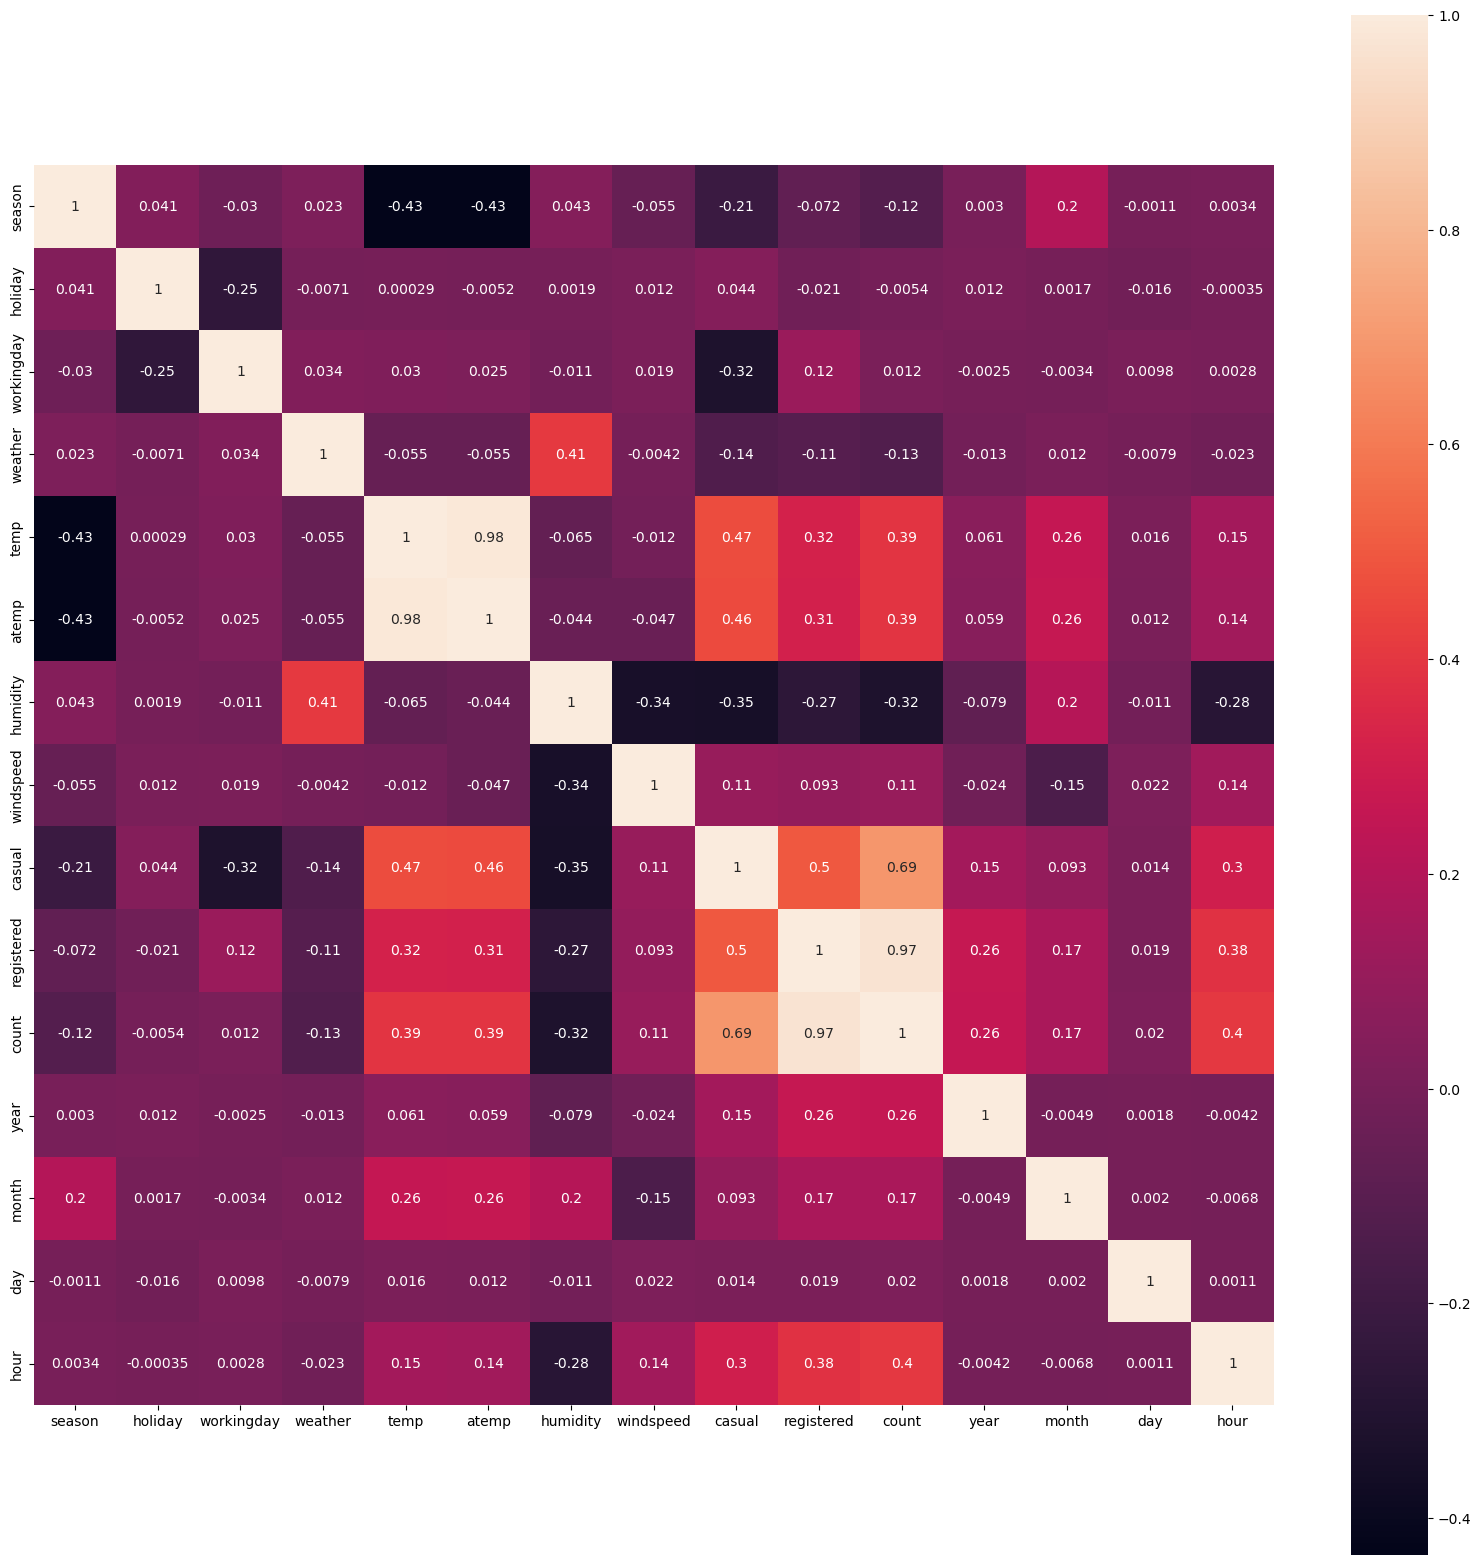

In [26]:
# windspeed를 수정한 후 다시 상관계수를 분석
# 우리의 기대와는 달리 windspeed와 count의 상관관계는 0.1에서 0.11로 간소한 차이만 보인다 

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

Min value of windspeed is 6.0032


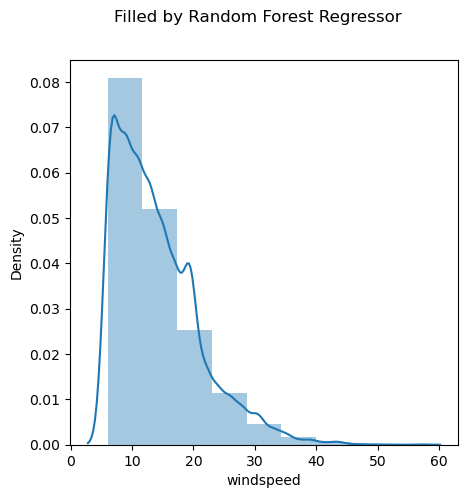

In [27]:
fig = plt.figure(figsize=[5,5])
sns.distplot(train['windspeed'],bins=np.linspace(train['windspeed'].min(),train['windspeed'].max(),10))
plt.suptitle("Filled by Random Forest Regressor")

print("Min value of windspeed is {}".format(train['windspeed'].min()))